In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>")) #作業領域を広くする

In [2]:
#kaggle課題　car fuel consumption ツールのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression,SGDClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from pandas.tools.plotting import scatter_matrix
from sklearn.metrics import classification_report, accuracy_score #予測結果の識別率を算出
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D #3D散布図の描画
# 回帰問題における性能評価に関する関数ラベルを予測
from  sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix 
import io
import datetime
from datetime import datetime as dt

In [4]:
df = pd.read_csv("measurements.csv")
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [5]:
df.notnull().sum() 

distance         388
consume          388
speed            388
temp_inside      376
temp_outside     388
specials          93
gas_type         388
AC               388
rain             388
sun              388
refill liters     13
refill gas        13
dtype: int64

In [6]:
df['specials'].value_counts().to_dict()

{'AC': 6,
 'AC Sun': 1,
 'AC rain': 9,
 'AC snow': 1,
 'AC sun': 1,
 'ac': 8,
 'ac rain': 1,
 'half rain half sun': 1,
 'rain': 32,
 'snow': 3,
 'sun': 27,
 'sun ac': 3}

In [7]:
#「specials」以外の変数でデータフレーム再作成
df2 = pd.read_csv("measurements.csv")[['distance','consume','speed', 'temp_inside', 'temp_outside','gas_type', 'AC',
                                                      'rain','sun','refill liters','refill gas']]
df2.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,E10,0,0,0,NaN,NaN


In [8]:
df3=df2.dropna(subset=['refill liters'])
df3.head(13)
#以下の結果から「gas_type」と「refill gas」は同種であり、混在がないと分かる。
#またrefill litersとconsumeは水準が1桁違うので、refill litersはconsumeに影響しないと考える。

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,E10,0,0,0,45,E10
44,"5,4","3,3",32,"21,5",7,SP98,0,0,0,"37,6",SP98
82,"10,5","3,6",42,20,10,SP98,0,0,0,"37,7",SP98
106,"162,7","5,5",75,23,1,SP98,0,0,0,45,SP98
139,"16,1","5,4",24,"21,5",7,E10,0,1,0,38,E10
171,"44,4","4,8",38,"21,5",8,E10,0,0,0,"38,3",E10
191,"43,7","4,7",44,22,9,SP98,0,1,0,10,SP98
192,"12,1","4,2",43,22,4,SP98,0,0,0,39,SP98
234,19,"4,5",29,"22,5",10,E10,0,0,0,39,E10
274,"25,7","4,9",50,22,10,SP98,0,1,0,41,SP98


In [9]:
df['gas_type'].value_counts().to_dict() #gas_typeの数を確認する

{'E10': 160, 'SP98': 228}

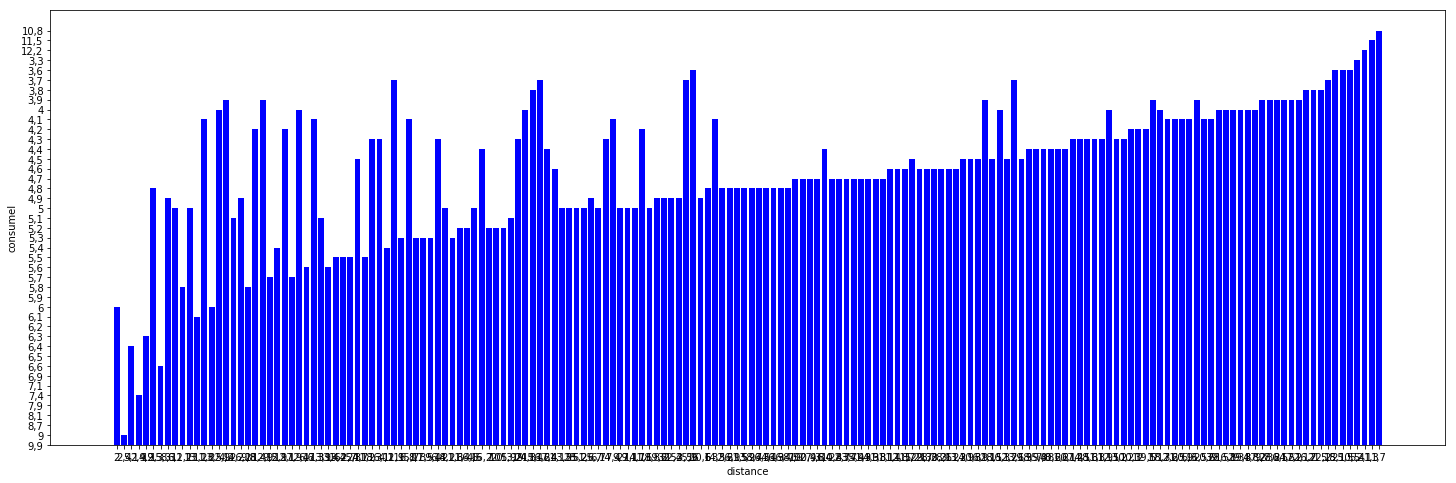

In [10]:
#consumeとdistanceの関係を確認する
df_S=df.sort_values(by='consume',ascending=False)
plt.figure(figsize=(25,8))
y=df_S["consume"]
x=df_S["distance"]
plt.bar(x,y,color="b")
plt.xlabel("distance")
plt.ylabel("consumel")
plt.show()

In [11]:
#SP98のデータフレーム
df_SP=df.drop(df.index[df["gas_type"] =='E10'], axis=0) 
df_SP.head(3)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
44,"5,4","3,3",32,"21,5",7,NaN,SP98,0,0,0,"37,6",SP98
45,2,"9,9",21,"21,5",4,NaN,SP98,0,0,0,NaN,NaN
46,"14,2","5,1",32,"21,5",7,NaN,SP98,0,0,0,NaN,NaN


In [12]:
#SP10のデータフレーム
df_E=df.drop(df.index[df["gas_type"] =='SP98'], axis=0) 
df_E.head(3)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN


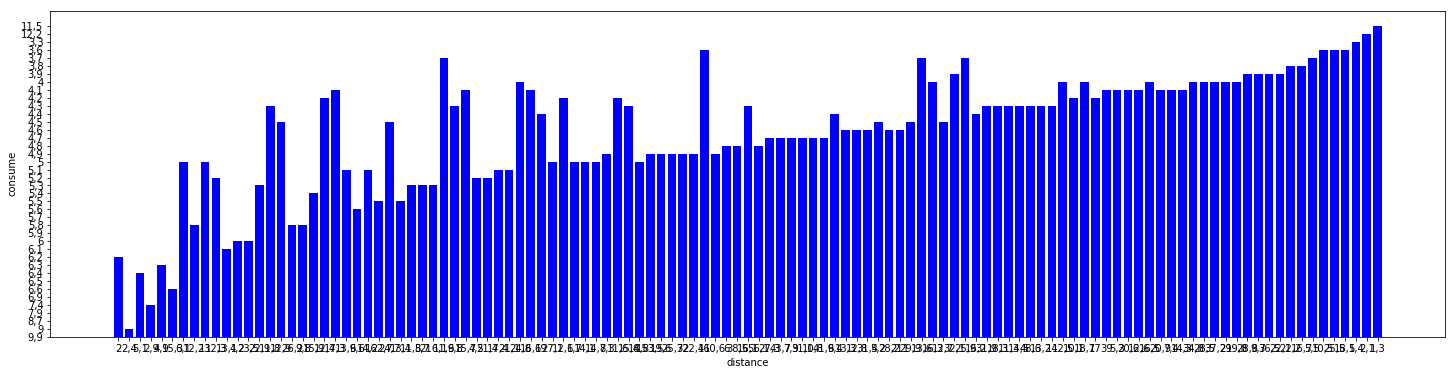

In [13]:
#SP98のconsumeとdistanceの関係を確認する
df_S_SP=df_SP.sort_values(by='consume',ascending=False)
plt.figure(figsize=(25,6))
y=df_S_SP["consume"]
x=df_S_SP["distance"]
plt.bar(x,y,color="b")
plt.xlabel("distance")
plt.ylabel("consume")
plt.show()

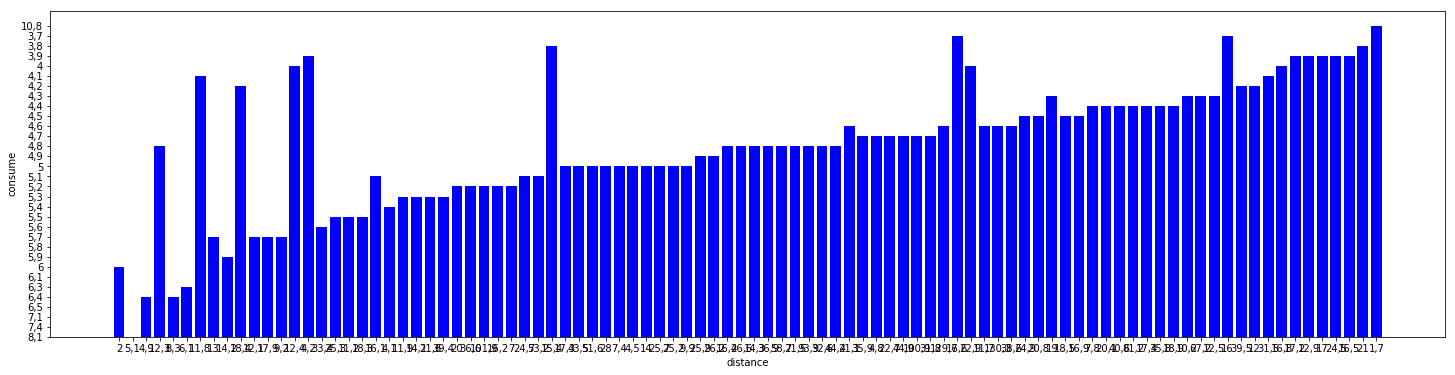

In [14]:
#E10のconsumeとdistanceの関係を確認する
df_S_E=df_E.sort_values(by='consume',ascending=False)
plt.figure(figsize=(25,6))
y=df_S_E["consume"]
x=df_S_E["distance"]
plt.bar(x,y,color="b")
plt.xlabel("distance")
plt.ylabel("consume")
plt.show()

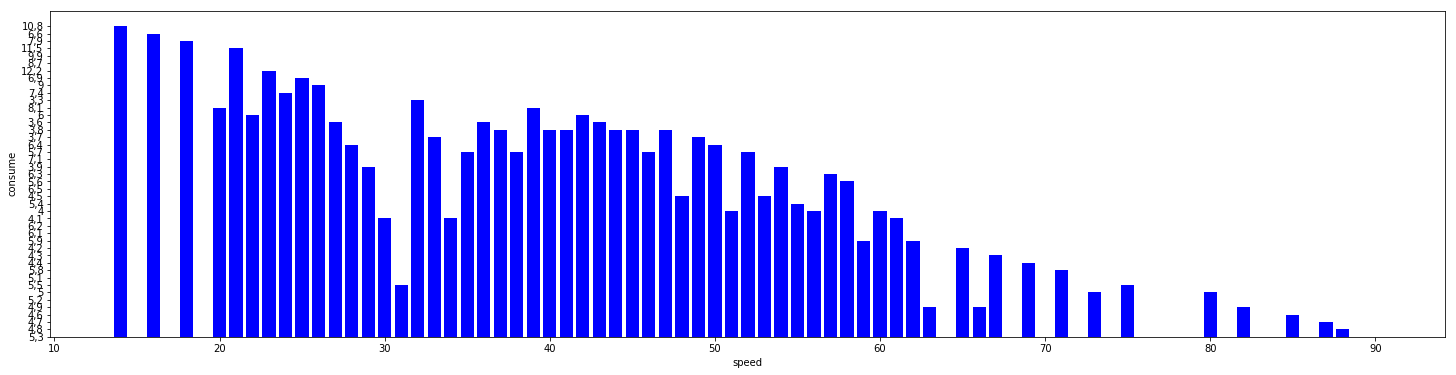

In [15]:
#全体のspeedとconsumeの関係を確認する
df_speed=df2.sort_values(by='speed',ascending=False)
plt.figure(figsize=(25,6))
y=df_speed["consume"]
x=df_speed["speed"]
plt.bar(x,y,color="b")
plt.xlabel("speed")
plt.ylabel("consume")
plt.show()

In [16]:
df2.describe()

,speed,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,41.927835,11.358247,0.077320,0.123711,0.082474
std,13.598524,6.991542,0.267443,0.329677,0.275441
min,14.000000,-5.000000,0.000000,0.000000,0.000000
25%,32.750000,7.000000,0.000000,0.000000,0.000000
50%,40.500000,10.000000,0.000000,0.000000,0.000000
75%,50.000000,16.000000,0.000000,0.000000,0.000000
max,90.000000,31.000000,1.000000,1.000000,1.000000


In [17]:
df2['distance']=df2['distance'].str.replace(",",".").astype(float)
df2['consume']=df2['consume'].str.replace(",",".").astype(float)
df2['temp_inside']=df2['temp_inside'].str.replace(",",".").astype(float)

In [18]:
df3=pd.get_dummies(df2['refill gas'])
df2=pd.concat([df2,df3],axis=1)
df2.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas,E10,SP98
0,28.0,5.0,26,21.5,12,E10,0,0,0,45,E10,1,0
1,12.0,4.2,30,21.5,13,E10,0,0,0,NaN,NaN,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0,NaN,NaN,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0,NaN,NaN,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0,NaN,NaN,0,0


In [19]:
#temp_insideの空白値等を平均値で埋める
value=df2['temp_inside'].mean()
df2['temp_inside']=df2['temp_inside'].replace([""],value)
df2['temp_inside']=df2['temp_inside'].replace(["nan"],value)
df2.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,E10,SP98
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,0.012887,0.020619
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441,0.112931,0.142287
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
df2['temp_inside'][93,95,97,98,99,100,102,201,203,261,267,268]=value

C:\Users\nqf49\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\nqf49\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [21]:
#「nan」が置き換わったことの確認
df2['temp_inside'][93]

21.929521276595743

In [22]:
#相関係数を算出
df2.corr()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,E10,SP98
distance,1.000000,-0.128967,0.562299,0.075178,0.088175,-0.025738,-0.019791,0.081120,0.026079,0.106134
consume,-0.128967,1.000000,-0.227866,-0.160623,-0.320811,0.096591,0.248118,-0.170667,-0.025731,-0.079080
speed,0.562299,-0.227866,1.000000,0.059293,0.015411,-0.035408,0.009489,0.081618,-0.073428,0.046177
temp_inside,0.075178,-0.160623,0.059293,1.000000,0.359500,0.297376,-0.036937,0.242248,-0.014897,-0.017092
temp_outside,0.088175,-0.320811,0.015411,0.359500,1.000000,0.167562,-0.186315,0.346903,-0.009135,-0.043809
AC,-0.025738,0.096591,-0.035408,0.297376,0.167562,1.000000,0.242915,0.088598,-0.033075,-0.042002
rain,-0.019791,0.248118,0.009489,-0.036937,-0.186315,0.242915,1.000000,-0.112650,0.026474,0.055653
sun,0.081120,-0.170667,0.081618,0.242248,0.346903,0.088598,-0.112650,1.000000,-0.034256,-0.043501
E10,0.026079,-0.025731,-0.073428,-0.014897,-0.009135,-0.033075,0.026474,-0.034256,1.000000,-0.016578
SP98,0.106134,-0.079080,0.046177,-0.017092,-0.043809,-0.042002,0.055653,-0.043501,-0.016578,1.000000


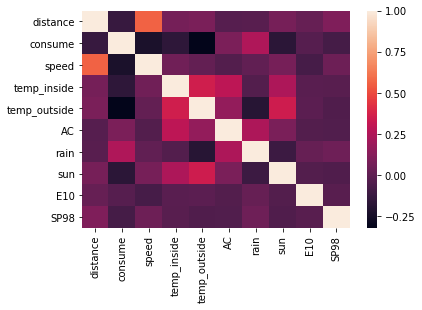

In [23]:
#相関係数をヒートマップにして可視化
sns.heatmap(df2.corr())
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022351E10630>,
      dtype=object)

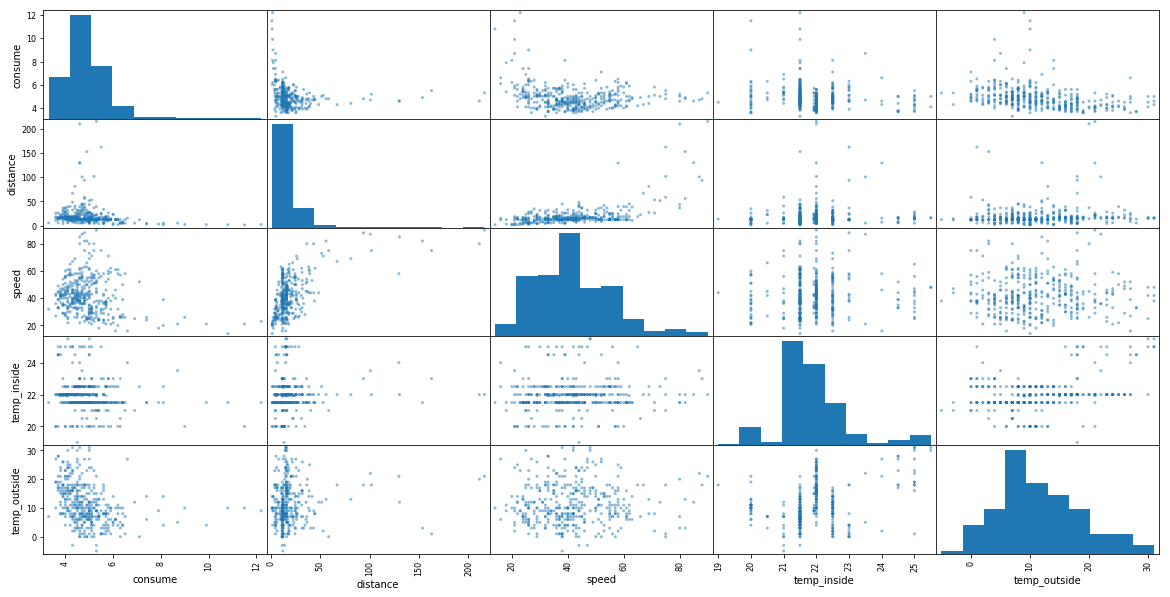

In [24]:
# 散布図行列を書いてみる
df10=df2[["consume","distance","speed","temp_inside","temp_outside"]]
pd.plotting.scatter_matrix(df10,figsize=(20,10)) #数字または数字化した要素での散布図の作成

In [25]:
#全てのデータで回帰
y=df2['consume'].values
X=df2.drop(["consume","refill liters","refill gas","gas_type"],axis=1).values

# 利用できるデータのうち、学習用を8割、テスト用を2割にする
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# 回帰
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("決定係数=%s"%regr.score(X,y))
print("MSE=%s"%round(mse,3) )
print("RMSE=%s"%round(np.sqrt(mse), 3) )
print("MAE=%s"%round(mae,3) )

決定係数=0.21401045557044052
MSE=0.641
RMSE=0.801
MAE=0.654


In [26]:
df11=df2[["distance","speed","temp_inside","temp_outside","rain","sun"]]
df11.corr()

,distance,speed,temp_inside,temp_outside,rain,sun
distance,1.000000,0.562299,0.075178,0.088175,-0.019791,0.081120
speed,0.562299,1.000000,0.059293,0.015411,0.009489,0.081618
temp_inside,0.075178,0.059293,1.000000,0.359500,-0.036937,0.242248
temp_outside,0.088175,0.015411,0.359500,1.000000,-0.186315,0.346903
rain,-0.019791,0.009489,-0.036937,-0.186315,1.000000,-0.112650
sun,0.081120,0.081618,0.242248,0.346903,-0.112650,1.000000


In [27]:
#consumeと相関の高いデータのうち、相互に相関が高い変数を除外して回帰　
y=df2['consume'].values
X=df2.drop(["consume","refill liters","refill gas","gas_type","sun","temp_inside","distance"],axis=1).values

# 利用できるデータのうち、学習用を8割、テスト用を2割にする
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# 回帰
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("決定係数=%s"%regr.score(X,y))
print("MSE=%s"%round(mse,3) )
print("RMSE=%s"%round(np.sqrt(mse), 3) )
print("MAE=%s"%round(mae,3) )

決定係数=0.20658333639554338
MSE=0.635
RMSE=0.797
MAE=0.646


In [28]:
#consumeと相関の高いデータのみで回帰（"AC","E10","SP98"を最初の回帰の説明変数からはずす）
y=df2['consume'].values
X=df2.drop(["consume","refill liters","refill gas","gas_type","AC","E10","SP98"],axis=1).values

# 利用できるデータのうち、学習用を8割、テスト用を2割にする
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# 回帰
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("決定係数=%s"%regr.score(X,y))
print("MSE=%s"%round(mse,3) )
print("RMSE=%s"%round(np.sqrt(mse), 3) )
print("MAE=%s"%round(mae,3) )

決定係数=0.19166857881937793
MSE=0.683
RMSE=0.826
MAE=0.673


In [29]:
#ヒートマップで相関の高いデータのみで回帰、説明変数間の相関は考慮せず（使用変数は"distance","speed","temp_outside"を最初の回帰の説明変数からはずす）
y=df2['consume'].values
X=df2.drop(["consume","refill liters","refill gas","gas_type","AC","E10","SP98","temp_inside","rain"],axis=1).values

# 利用できるデータのうち、学習用を8割、テスト用を2割にする
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# 回帰
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("決定係数=%s"%regr.score(X,y))
print("MSE=%s"%round(mse,3) )
print("RMSE=%s"%round(np.sqrt(mse), 3) )
print("MAE=%s"%round(mae,3) )

決定係数=0.15204955037845158
MSE=0.69
RMSE=0.831
MAE=0.683


In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [31]:
#consumeと相関の高いデータのうち、相互に相関が高い変数を除外して回帰　
y=df2['consume'].values
X=df2.drop(["consume","refill liters","refill gas","gas_type","sun","temp_inside","distance"],axis=1).values

# 利用できるデータのうち、学習用を8割、テスト用を2割にする
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# 回帰
regr = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())])

regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("決定係数=%s"%regr.score(X,y))
print("MSE=%s"%round(mse,3) )
print("RMSE=%s"%round(np.sqrt(mse), 3) )
print("MAE=%s"%round(mae,3) )

決定係数=0.3409966153720253
MSE=0.521
RMSE=0.722
MAE=0.559


In [32]:
#全てのデータで多項式回帰
y=df2['consume'].values
X=df2.drop(["consume","refill liters","refill gas","gas_type"],axis=1).values

# 利用できるデータのうち、学習用を8割、テスト用を2割にする
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# 回帰
regr = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())])

regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("決定係数=%s"%regr.score(X,y))
print("MSE=%s"%round(mse,3) )
print("RMSE=%s"%round(np.sqrt(mse), 3) )
print("MAE=%s"%round(mae,3) )

決定係数=0.3637235878364611
MSE=0.935
RMSE=0.967
MAE=0.666
